In [1]:
pip install transformers

In [2]:

import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from PIL import Image
import os

def image_grid(imgs,cols):
  rows = (len(imgs)+cols-1)//cols
  w,h = imgs[0].size
  grid = Image.new('RGB',size=(cols*w,rows*h))

  for i,img in enumerate(imgs):
    grid.paste(img,box=(i%cols*w,i//cols*h))
  return grid

# Directory containing images
image_folder = '/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/CLIP_Classification/images'

#load images from the folder
images = []
for filename in os.listdir(image_folder):
  if filename.endswith('.jpg') or filename.endwith('.png') or filename.endwith('.jpeg'):
    img_path = os.path.join(image_folder,filename)
    images.append(Image.open(img_path))

#create and display the grid
if images:
  grid = image_grid(images,cols=3)
  display(grid)
else:
  print("No images found in the folder")

Output hidden; open in https://colab.research.google.com to view.

In [19]:
classes = ['giraffe','zebera','elephent','teddybear','hotdog']
inputs = processor(text=classes,images=images,return_tensors='pt',padding=True)

outputs = model(**inputs) # **mean it will get the data seperatted


In [21]:
logits_per_image = outputs.logits_per_image
logits_per_image

tensor([[26.2836, 19.8203, 20.6543, 14.8227, 14.1760],
        [24.2384, 22.2468, 25.4108, 16.6669, 14.4600],
        [16.9787, 17.3413, 26.2869, 16.4111, 13.8733],
        [23.0606, 19.7010, 27.4153, 18.6095, 15.4316],
        [19.6150, 15.4622, 21.8557, 27.0995, 16.3832],
        [15.0464, 18.1885, 16.6754, 18.6200, 25.9556]], grad_fn=<TBackward0>)

In [5]:

#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#image = Image.open(requests.get(url, stream=True).raw)

#inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

#outputs = model(**inputs)
#logits_per_image = outputs.logits_per_image # this is the image-text similarity score
#probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities


In [22]:
probs= logits_per_image.softmax(dim=1)
probs

tensor([[9.9486e-01, 1.5517e-03, 3.5729e-03, 1.0480e-05, 5.4895e-06],
        [2.2900e-01, 3.1251e-02, 7.3961e-01, 1.1792e-04, 1.2975e-05],
        [9.0647e-05, 1.3027e-04, 9.9972e-01, 5.1386e-05, 4.0616e-06],
        [1.2677e-02, 4.4051e-04, 9.8673e-01, 1.4788e-04, 6.1624e-06],
        [5.5845e-04, 8.7788e-06, 5.2494e-03, 9.9416e-01, 2.2049e-05],
        [1.8267e-05, 4.2293e-04, 9.3143e-05, 6.5110e-04, 9.9881e-01]],
       grad_fn=<SoftmaxBackward0>)

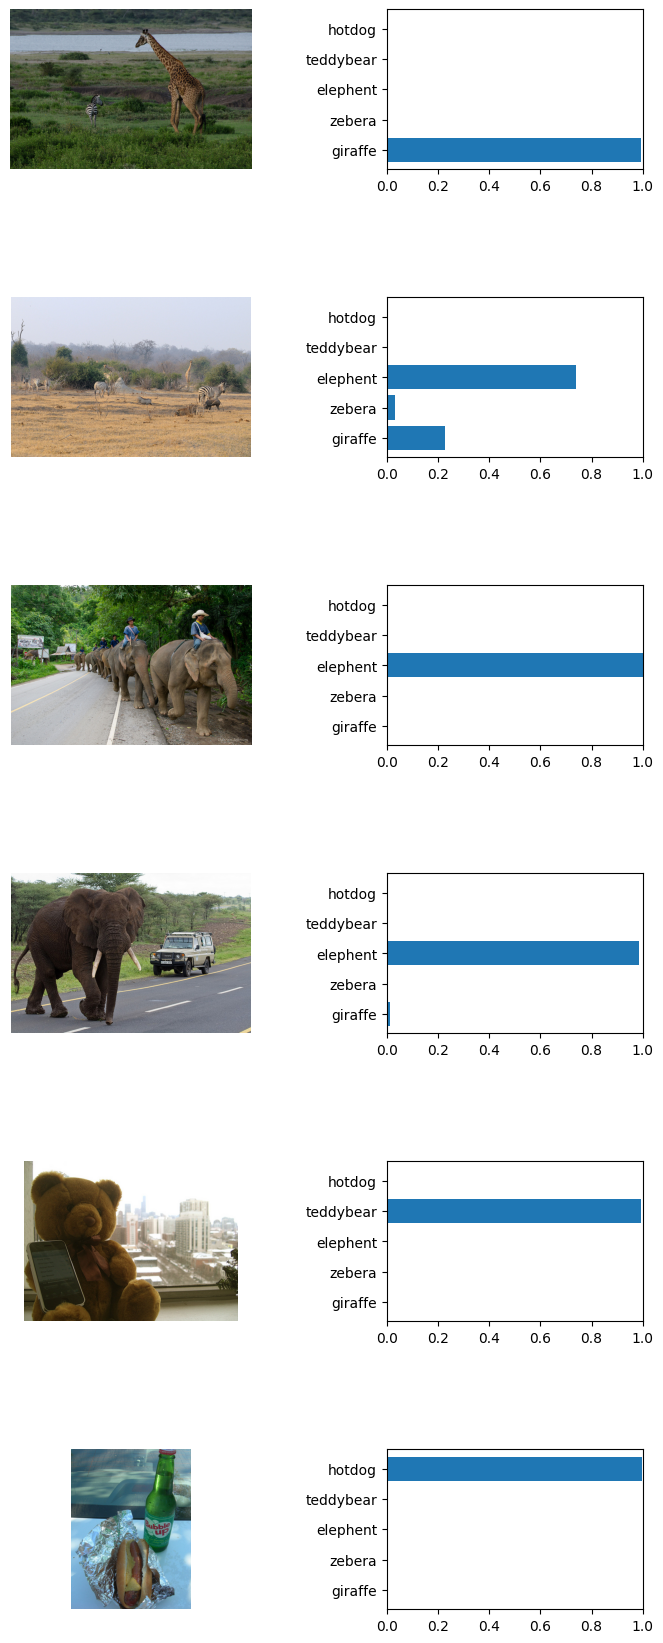

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,20))

for idx in range(len(images)):

  #show origenal image
  fig.add_subplot(len(images),2,2*(idx+1)-1)
  plt.imshow(images[idx])
  plt.axis('off')
  #plt.xticks([])
  #plt.yticks([])

  #show probabilities
  fig.add_subplot(len(images),2,2*(idx+1))
  plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
  plt.xlim(0,1.0)

  plt.subplots_adjust(left=0.1,
                      bottom=0.1,
                      right=0.9,
                      top=0.9,
                      wspace=0.5,
                      hspace=0.8)